In [1]:
import matplotlib.pyplot as plt, skimage, OpenVisus as ov, getversion as gv, packaging as pk, numpy as np, shutil, os

Starting OpenVisus C:\Users\Vlaerio's PC\AppData\Roaming\Python\Python37\site-packages\OpenVisus\__init__.py 3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)] sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0) ...


In [2]:
import numpy as np
volume = np.zeros((93,91,91), dtype=np.int32)

from csv import reader
# open file in read mode
with open('assets/MgNd_nfHEDM_cropped_pointcloud.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    rows = list(csv_reader)
#     for row in rows[:10]:
#         # row variable is a list that represents a row in csv
#         print(row)
    for row in rows:
        # row variable is a list that represents a row in csv
        volume[int(row[1]),int(row[2]),int(row[3])] = int(row[0])

volume = np.delete(volume,0,0)
volume = np.delete(volume,0,1)
volume = np.delete(volume,0,2)
print(volume.shape)
volMin=np.min(volume)
volMax=np.max(volume)
print("Range = (",volMin,",",volMax,")")


(92, 90, 90)
Range = ( 0 , 686 )


In [9]:
np.save("MgNd_nfHEDM_cropped_pointcloud.npy", volume)

In [3]:
%%time
idx_filename = idx_filename='./MgNd_nfHEDM_cropped_pointcloud/visus.idx'
shutil.rmtree(os.path.dirname(idx_filename), ignore_errors=True)
db = ov.CreateIdx(url=idx_filename, dim=3, dims=[volume.shape[2],volume.shape[1], volume.shape[0] ],
               fields=[ov.Field.fromString("data int32 min("+str(volMin)+") max("+str(volMax)+")")])
db.writeSlabs(volume, field = 'data')

Wall time: 19.5 ms


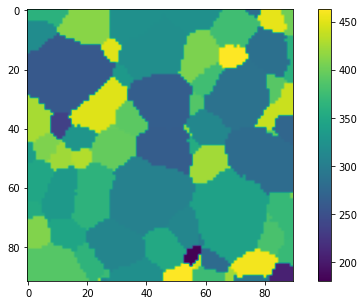

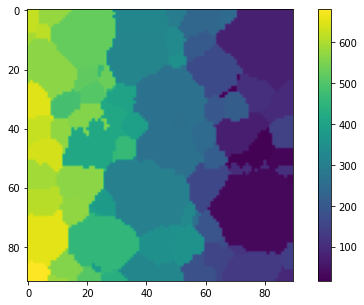

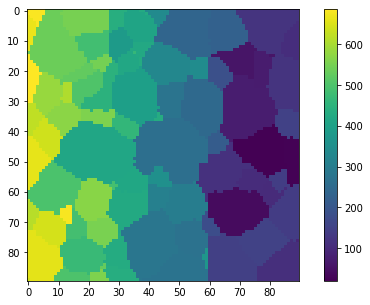

In [15]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(9,5)
slice = volume[:,:,40]
im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(9,5)
slice = volume[:,40,:]
im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(9,5)
slice = volume[45,:,:]
im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

